In [1]:
# DISCLAIMER : this is just a sample code for VaR analysis 
# and not any sort of investment advice advocated either by me or the firm that I work for

import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import datetime as dt
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stat
from IPython.core.pylabtools import figsize

In [2]:
tickers = ['AAPL','FB', 'GOOG', 'AMZN', 'NFLX', 'MSFT']
weights = np.array([.16, .17, .16, .17, .17,.17])
initial_investment = 1000000 # 1 mn USD
data = pdr.get_data_yahoo(tickers, start="2017-01-01", end=dt.date.today())['Close']
returns = data.pct_change()
returns.tail()

Symbols,AAPL,FB,GOOG,AMZN,NFLX,MSFT
Date,,,,,,
2020-10-14,0.000743,-0.015644,-0.002291,-0.023208,-0.022812,-0.008974
2020-10-15,-0.003961,-0.018762,-0.005708,-0.007450,0.000905,-0.005433
2020-10-16,-0.014001,-0.002962,0.008902,-0.019750,-0.020574,0.000000
2020-10-19,-0.025542,-0.017035,-0.024412,-0.020014,-0.000132,-0.024766
2020-10-20,0.013192,0.023565,0.013893,0.003056,-0.009986,0.002007


In [3]:
cov_matrix = returns.cov()
cov_matrix

Symbols,AAPL,FB,GOOG,AMZN,NFLX,MSFT
Symbols,,,,,,
AAPL,0.000398,0.000259,0.000242,0.000245,0.000244,0.000274
FB,0.000259,0.000451,0.000262,0.000254,0.000270,0.000252
GOOG,0.000242,0.000262,0.000306,0.000234,0.000247,0.000254
AMZN,0.000245,0.000254,0.000234,0.000371,0.000308,0.000254
NFLX,0.000244,0.000270,0.000247,0.000308,0.000623,0.000264
MSFT,0.000274,0.000252,0.000254,0.000254,0.000264,0.000335


In [4]:
avg_rets = returns.mean() #mean per equity
port_mean = avg_rets.dot(weights) # dot product to find mean of portfolio
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
print (port_stdev)
mean_investment = (1 + port_mean) * initial_investment
stdev_investment = initial_investment * port_stdev

0.016858651696878484


In [14]:
cutoff = norm.ppf(0.05, mean_investment, stdev_investment) #assuming confidence level = 95%
# ppf is the inverse of CDF to map x for given f(x); here Z-value which we refer from log table book
var = initial_investment - cutoff
var

26296.891570690903

0 day VaR >> @ Confidence level 95% >> 0.0
1 day VaR >> @ Confidence level 95% >> 26296.89
2 day VaR >> @ Confidence level 95% >> 37189.42
3 day VaR >> @ Confidence level 95% >> 45547.55
4 day VaR >> @ Confidence level 95% >> 52593.78
5 day VaR >> @ Confidence level 95% >> 58801.64
6 day VaR >> @ Confidence level 95% >> 64413.97
7 day VaR >> @ Confidence level 95% >> 69575.04
8 day VaR >> @ Confidence level 95% >> 74378.84
9 day VaR >> @ Confidence level 95% >> 78890.67
10 day VaR >> @ Confidence level 95% >> 83158.07
11 day VaR >> @ Confidence level 95% >> 87216.92
12 day VaR >> @ Confidence level 95% >> 91095.1
13 day VaR >> @ Confidence level 95% >> 94814.79
14 day VaR >> @ Confidence level 95% >> 98393.96
15 day VaR >> @ Confidence level 95% >> 101847.42
16 day VaR >> @ Confidence level 95% >> 105187.57
17 day VaR >> @ Confidence level 95% >> 108424.86
18 day VaR >> @ Confidence level 95% >> 111568.26
19 day VaR >> @ Confidence level 95% >> 114625.49
20 day VaR >> @ Confidence leve

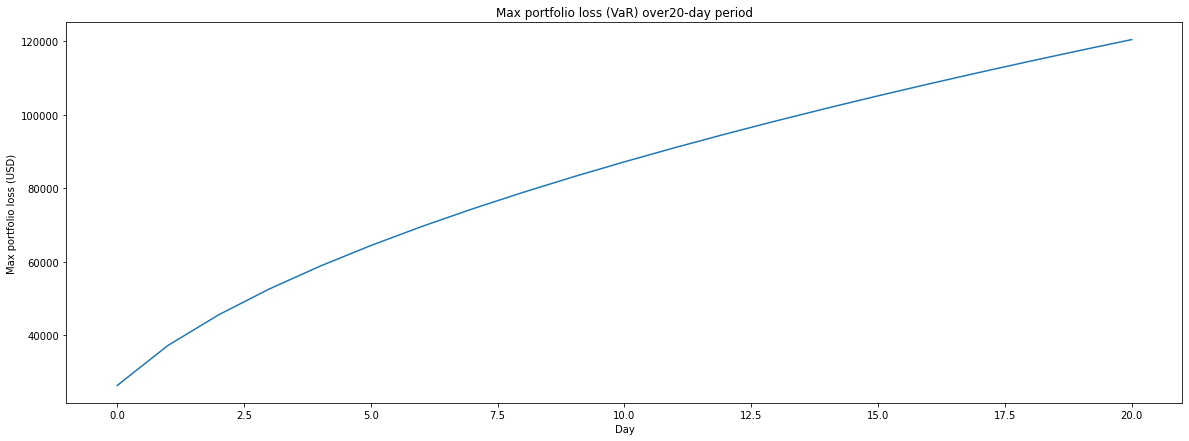

In [9]:
var_array = []
days = [20] #since it is 0.05 VaR
for y in days:
    var_array = []
    for x in range(y + 1):
        var_array.append(np.round(var * np.sqrt(x + 1), 5))
        print(str(x) + " day VaR >> @ Confidence level 95% >> " + str(np.round(var * np.sqrt(x),2)))

    figsize(20, 7)
    plt.xlabel("Day")
    plt.ylabel("Max portfolio loss (USD)")
    plt.title("Max portfolio loss (VaR) over" + str(y) + "-day period")
    plt.show(plt.plot(var_array))

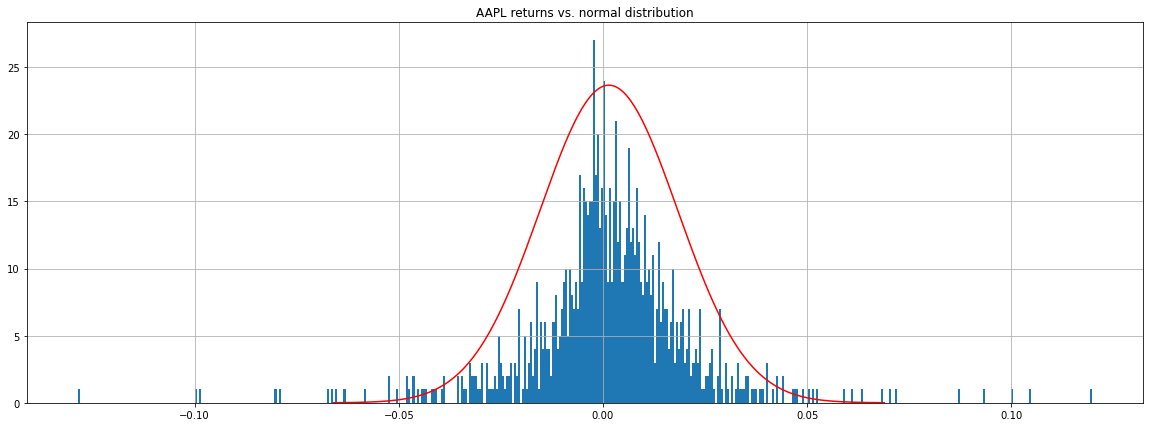

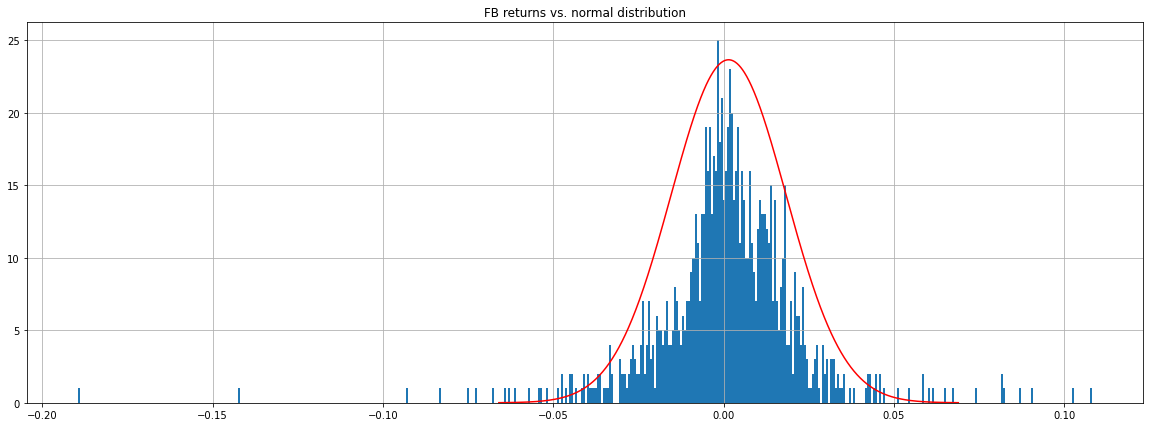

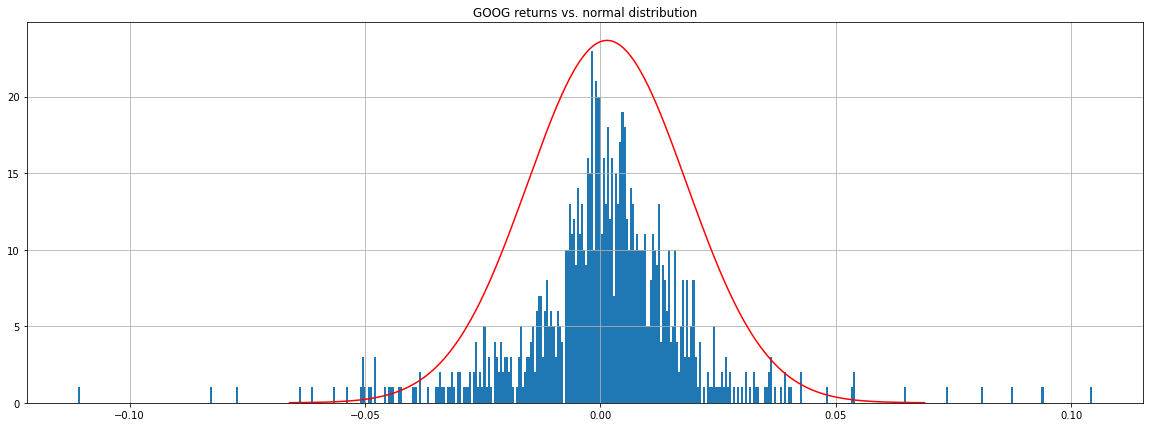

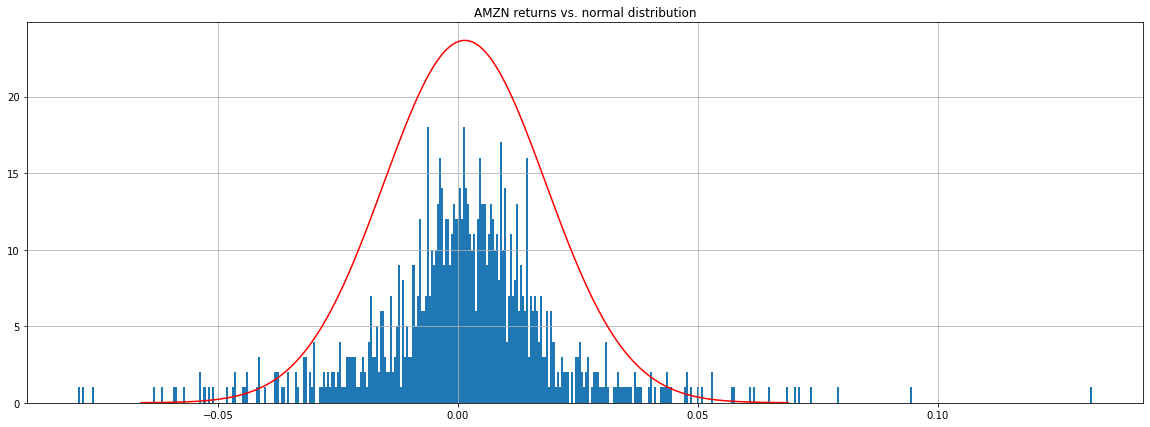

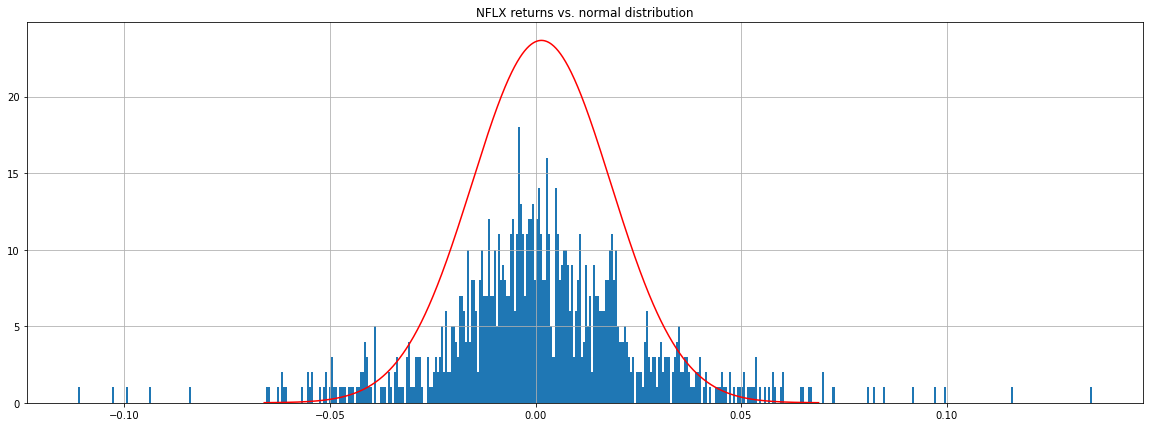

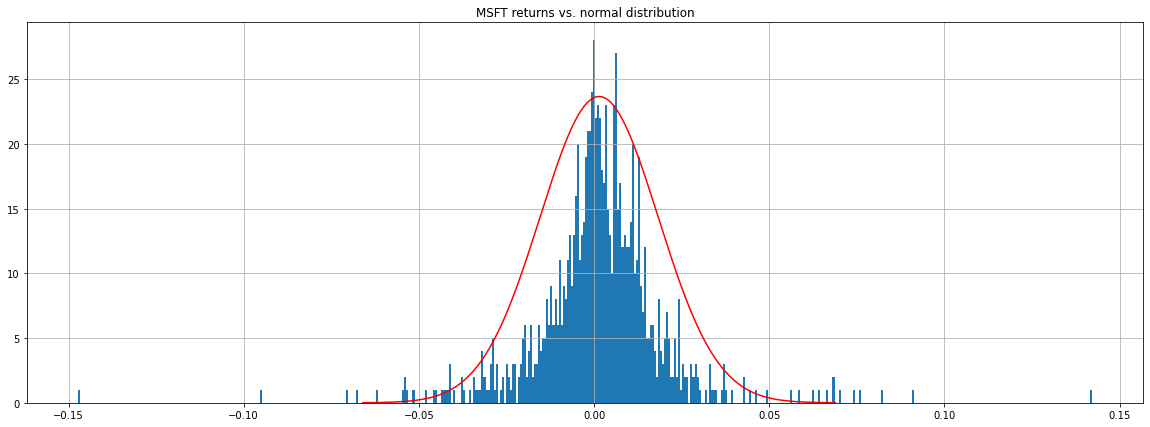

In [11]:
for i in tickers:
    returns[i].hist(bins = 500) # to capture ALL events possible and no chance for any left tail events ;)
    x = np.linspace(port_mean - 4 * port_stdev, port_mean + 4 * port_stdev, 1000) # the normal 3 SD's apart for fat-tailedness
    figsize(20, 7)
    plt.plot(x, norm.pdf(x, port_mean, port_stdev), "r")
    plt.title(i + " returns vs. normal distribution")
    plt.show()